Hit Or Miss Practica


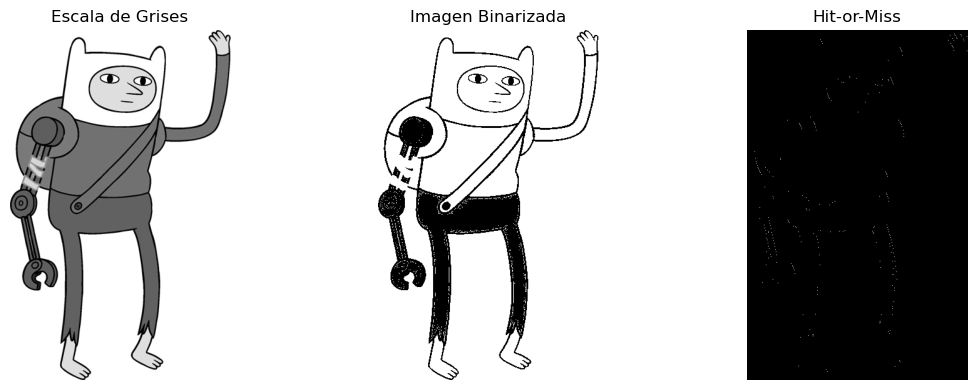

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('finn.jpg', cv2.IMREAD_GRAYSCALE)
_, binaria = cv2.threshold(imagen, 100, 255, cv2.THRESH_BINARY)

estructura = np.array([
    [-1,  1,  0],
    [ 0, -1,  0],
    [ 0,  0,  1]
], dtype=np.int8)

resultado = cv2.morphologyEx(binaria, cv2.MORPH_HITMISS, estructura)

etiquetas = ['Escala de Grises', 'Imagen Binarizada', 'Hit-or-Miss']
imagenes = [imagen, binaria, resultado]

plt.figure(figsize=(12, 4))

for idx, img in enumerate(imagenes):
    plt.subplot(1, 3, idx + 1)
    plt.imshow(img, cmap='gray')
    plt.title(etiquetas[idx])
    plt.axis('off')

plt.tight_layout()
plt.show()


skimage

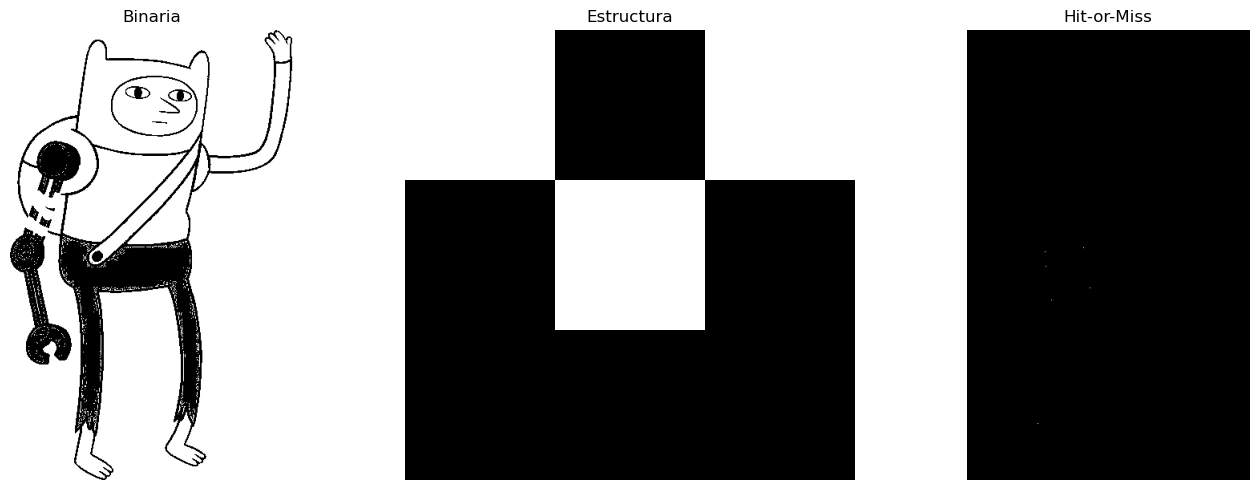

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from scipy.ndimage import binary_hit_or_miss

def operacion_hit_or_miss(ruta_imagen, estructura_patron, estructura_fondo=None):
    imagen = io.imread(ruta_imagen)
    if imagen.ndim == 3:
        imagen = color.rgb2gray(imagen)
    imagen_binaria = imagen > 0.4

    if estructura_fondo is None:
        estructura_fondo = np.logical_not(estructura_patron)

    resultado = binary_hit_or_miss(imagen_binaria, 
                                   structure1=estructura_patron, 
                                   structure2=estructura_fondo)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(imagen_binaria, cmap='gray')
    axs[0].set_title('Binaria')
    axs[0].axis('off')

    axs[1].imshow(estructura_patron, cmap='gray')
    axs[1].set_title('Estructura')
    axs[1].axis('off')

    axs[2].imshow(resultado, cmap='gray')
    axs[2].set_title('Hit-or-Miss')
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()

    return resultado

estructura = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [0, 0, 0]
], dtype=bool)

resultado = operacion_hit_or_miss('finn.jpg', estructura)


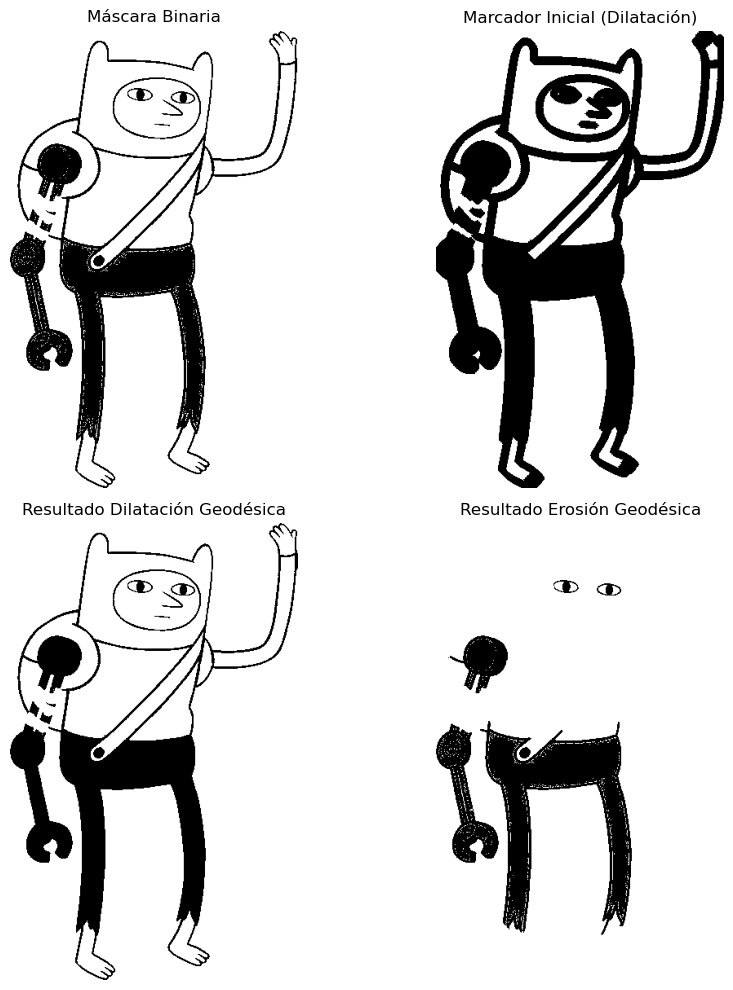

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('finn.jpg', cv2.IMREAD_GRAYSCALE)
_, mascara = cv2.threshold(imagen, 100, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
marcador_dil = cv2.erode(mascara, kernel, iterations=2)
marcador_ero = cv2.dilate(mascara, kernel, iterations=2)

def dilatacion_geodesica(marcador, mascara, kernel, max_iter=15):
    actual = marcador.copy()
    for _ in range(max_iter):
        dilatado = cv2.dilate(actual, kernel)
        siguiente = np.minimum(dilatado, mascara)
        if np.array_equal(siguiente, actual):
            break
        actual = siguiente
    return actual

def erosion_geodesica(marcador, mascara, kernel, max_iter=15):
    actual = marcador.copy()
    for _ in range(max_iter):
        erosionado = cv2.erode(actual, kernel)
        siguiente = np.maximum(erosionado, mascara)
        if np.array_equal(siguiente, actual):
            break
        actual = siguiente
    return actual

dil_geo = dilatacion_geodesica(marcador_dil, mascara, kernel)
ero_geo = erosion_geodesica(marcador_ero, mascara, kernel)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(mascara, cmap='gray')
axs[0, 0].set_title('Máscara Binaria')
axs[0, 0].axis('off')

axs[0, 1].imshow(marcador_dil, cmap='gray')
axs[0, 1].set_title('Marcador Inicial (Dilatación)')
axs[0, 1].axis('off')

axs[1, 0].imshow(dil_geo, cmap='gray')
axs[1, 0].set_title('Resultado Dilatación Geodésica')
axs[1, 0].axis('off')

axs[1, 1].imshow(ero_geo, cmap='gray')
axs[1, 1].set_title('Resultado Erosión Geodésica')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()
